Import the liabraries needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/EDA Project/bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Check rows and columns

In [5]:
df.shape

(11162, 17)

Get info about the data(type and null)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Quick statistics

In [7]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


Check target distribution (y)

In [8]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [9]:
# 4) Proportion of each class (yes / no)
df['deposit'].value_counts(normalize=True)

,proportion
deposit,
no,0.52616
yes,0.47384


Check for missing values and duplicates

In [10]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


As shown above, there are no missing values in the dataset.

In [11]:
df.duplicated().sum()

np.int64(0)

As shown above, there are no duplicated values in the dataset.

In [12]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print('-' * 40)

job
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
----------------------------------------
marital
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64
----------------------------------------
education
education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64
----------------------------------------
default
default
no     10994
yes      168
Name: count, dtype: int64
----------------------------------------
housing
housing
no     5881
yes    5281
Name: count, dtype: int64
----------------------------------------
loan
loan
no     9702
yes    1460
Name: count, dtype: int64
----------------------------------------
contact
contact
cellular     8042
unknown      2346

Create an age_group column

In [13]:
bins = [17, 30, 40, 50, 100]
labels = ['<30', '30-40', '40-50', '50+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['age_group'].value_counts()

,count
age_group,
30-40,4318
50+,2665
40-50,2628
<30,1551


To simplify the analysis, I grouped customers into four age segments: <30, 30–40, 40–50, and 50+. This makes it easier to compare behavior across meaningful age categories instead of individual ages.
The largest group in the dataset is 30–40 years old, followed by 40–50 and 50+, while the <30 segment is the smallest.

Simple distributions (target + age_group)

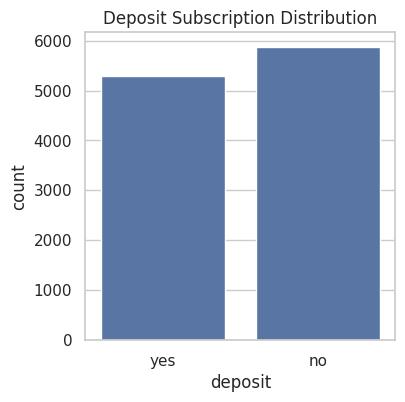

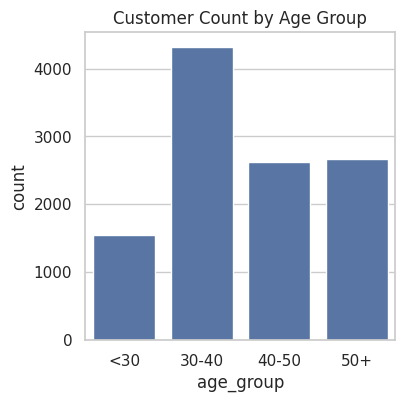

In [28]:
sns.set(style="whitegrid")

plt.figure(figsize=(4,4))
sns.countplot(x='deposit', data=df)
plt.title('Deposit Subscription Distribution')
plt.show()

plt.figure(figsize=(4,4))
sns.countplot(x='age_group', data=df, order=['<30','30-40','40-50','50+'])
plt.title('Customer Count by Age Group')
plt.show()



*  The first graph shows that the number of customers who did not subscribe to the deposit is higher than the number of customers who did subscribe.
*  The second graph shows that most customers are aged 30–40, followed by 40–50, then 50+, and finally the <30 age group, which is the smallest.




 Conversion rate by age group

In [16]:
df['deposit_flag'] = (df['deposit'] == 'yes').astype(int)
conv_rate_age = df.groupby('age_group')['deposit_flag'].mean()
conv_rate_age

/tmp/ipython-input-3814613117.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_rate_age = df.groupby('age_group')['deposit_flag'].mean()


,deposit_flag
age_group,
<30,0.598324
30-40,0.443029
40-50,0.404490
50+,0.519700


First, I create a new column deposit_flag that is 1 if the customer subscribed to the deposit (deposit == 'yes') and 0 otherwise.
Then, I group the data by age_group and calculate the mean of deposit_flag within each group. Since deposit_flag is 1 for “yes” and 0 for “no”, this mean represents the conversion rate (proportion of customers who subscribed) for each age group.
As shown bellow, the highest conversion rate is in the <30 age group (≈59%), followed by the 50+ group (≈51%), then 30–40 (≈44%), and finally 40–50 (≈40%), which has the lowest conversion rate

Analysis by Job Type  

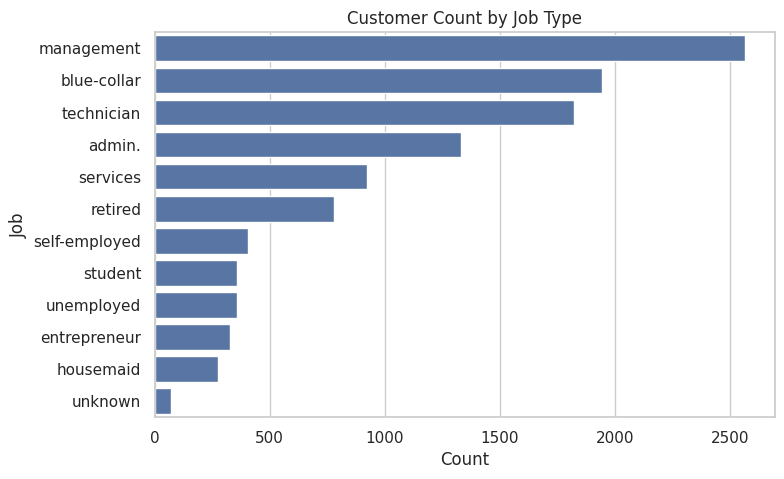

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(y='job', data=df, order=df['job'].value_counts().index)
plt.title('Customer Count by Job Type')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

This chart shows the distribution of customers by job type. The largest groups are management, blue-collar, and technician, followed by admin and services roles. Smaller segments include retired, self-employed, students, unemployed, entrepreneurs, and housemaids, while the unknown job category is very small.
This indicates that the campaign mainly targets customers in professional, blue‑collar, and technical occupations, and insights based on job type will be most reliable for these larger groups.

In [35]:
conv_rate_job = df.groupby('job')['deposit_flag'].mean()
conv_rate_job

,deposit_flag
job,
admin.,0.473013
blue-collar,0.364198
entrepreneur,0.375000
housemaid,0.397810
management,0.507015
retired,0.663239
self-employed,0.461728
services,0.399783
student,0.747222


This table shows the conversion rate by job type, the proportion of customers in each job category who subscribed to the deposit.
The highest conversion rates are observed for students (≈75%), retired customers (≈66%), and the unemployed (≈57%), all well above the overall average. Management is also above average at around 51%.
In contrast, blue‑collar, entrepreneur, services, and housemaid customers have lower conversion rates (around 36–40%).
From a marketing perspective, this suggests that students, retired, unemployed, and management segments are particularly responsive to this offer, while blue‑collar and some service‑oriented roles may require a different message or may be less interested in term deposits.

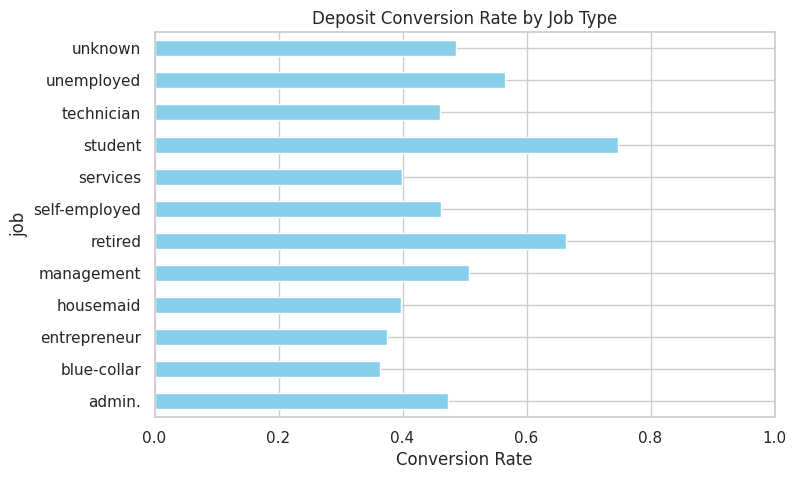

In [38]:
plt.figure(figsize=(8,5))
conv_rate_job.plot(kind='barh', color='skyblue')
plt.xlabel('Conversion Rate')
plt.title('Deposit Conversion Rate by Job Type')
plt.xlim(0, 1)
plt.show()

Distribution of Contact Methods

In [41]:
df['contact'].value_counts()

,count
contact,
cellular,8042
unknown,2346
telephone,774


This table shows how customers were contacted during the campaign. The vast majority were reached via cellular (over 8,000 records), while a smaller group has unknown contact type, and only a limited number were contacted by telephone (fewer than 1,000). This indicates that the campaign relies mainly on cellular communication, with traditional telephone contact used much less frequently.

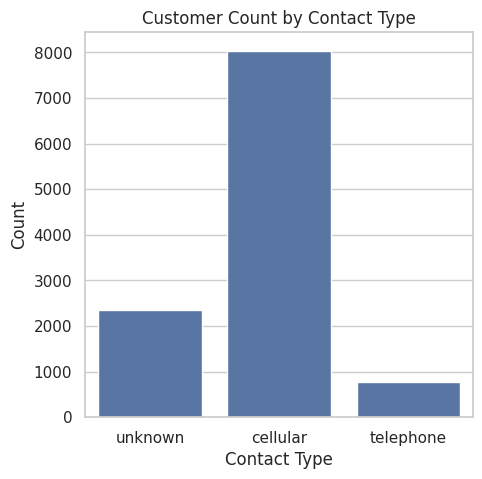

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x='contact', data=df)
plt.title('Customer Count by Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.show()

In [44]:
conv_rate_contact = df.groupby('contact')['deposit_flag'].mean()
conv_rate_contact

,deposit_flag
contact,
cellular,0.543273
telephone,0.503876
unknown,0.225916


This table shows the conversion rate by contact method. Customers contacted via cellular have the highest conversion rate (≈54%), followed by telephone (≈50%). Records with unknown contact type have a much lower conversion rate (≈23%). This suggests that both cellular and telephone are effective channels, while the “unknown” group is much less responsive or poorly recorded.

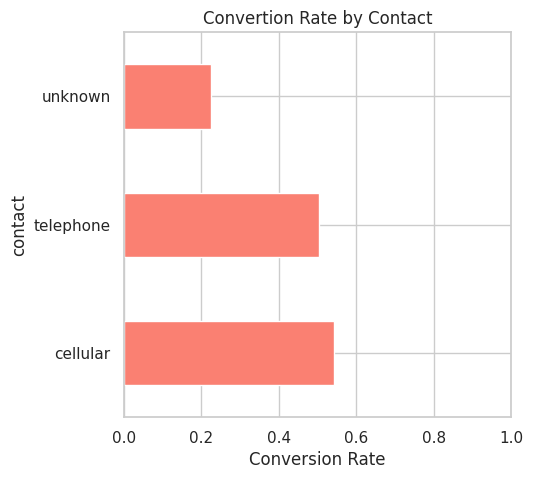

In [49]:
plt.figure(figsize=(5,5))
conv_rate_contact.plot(kind='barh', color='salmon')
plt.xlabel('Conversion Rate')
plt.title('Convertion Rate by Contact')
plt.xlim(0,1)
plt.show()

Analysis by Marital Status

In [50]:
df['marital'].value_counts()

,count
marital,
married,6351
single,3518
divorced,1293


This table shows the distribution of customers by marital status. The majority of clients are married (over 6,000), followed by single customers, while divorced customers form the smallest group. This means most campaign results will be driven by the behavior of married and single customers.

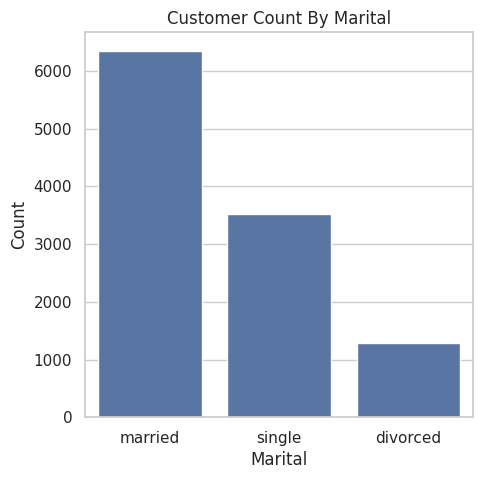

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(x='marital', data=df)
plt.title('Customer Count By Marital')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.show()

In [52]:
conv_rate_marital = df.groupby('marital')['deposit_flag'].mean()
conv_rate_marital

,deposit_flag
marital,
divorced,0.481052
married,0.433790
single,0.543491


This table shows the deposit conversion rate by marital status. Single customers have the highest conversion rate (≈54%), followed by divorced customers (≈48%), while married customers have the lowest rate (≈43%). This suggests that, under the current campaign, single and divorced customers are slightly more likely to subscribe than married customers.

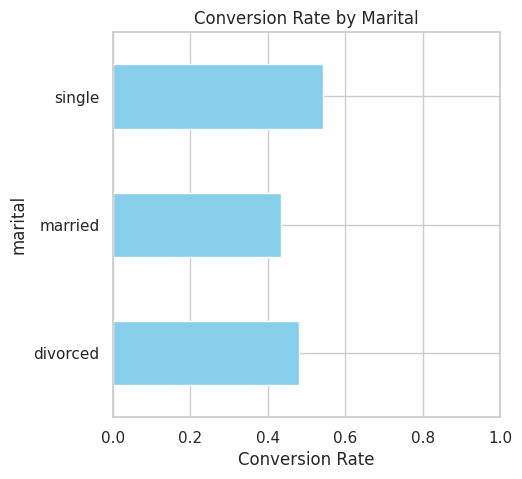

In [53]:
plt.figure(figsize=(5,5))
conv_rate_marital.plot(kind='barh', color='skyblue')
plt.xlabel('Conversion Rate')
plt.title('Conversion Rate by Marital')
plt.xlim(0,1)
plt.show()

Analysis by Education Level

In [57]:
df['education'].value_counts()

,count
education,
secondary,5476
tertiary,3689
primary,1500
unknown,497


This table shows the distribution of customers by education level. Most clients have secondary education (about 5,500), followed by those with tertiary education, while primary education is less common. The unknown education category is relatively small. This means the campaign mainly targets customers with secondary and tertiary education.

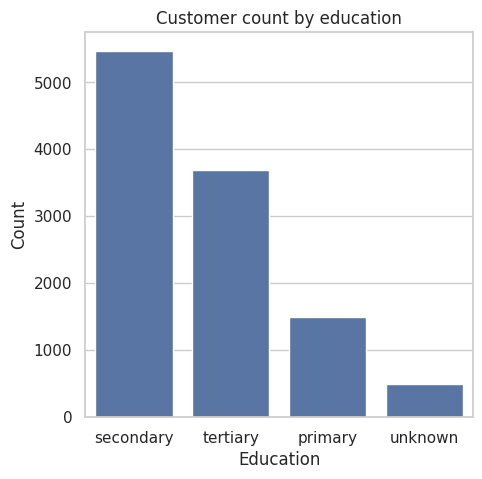

In [59]:
plt.figure(figsize=(5,5))
sns.countplot(x='education', data=df)
plt.title('Customer count by education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [61]:
conv_rate_education = df.groupby('education')['deposit_flag'].mean()
conv_rate_education

,deposit_flag
education,
primary,0.394000
secondary,0.447407
tertiary,0.541068
unknown,0.507042


This table shows the deposit conversion rate by education level. Customers with tertiary education have the highest conversion rate (≈54%), followed by those with unknown education (≈51%) and secondary education (≈45%). Clients with primary education have the lowest conversion rate (≈39%). This suggests that, in this campaign, customers with higher education levels are more likely to subscribe to the term deposit.

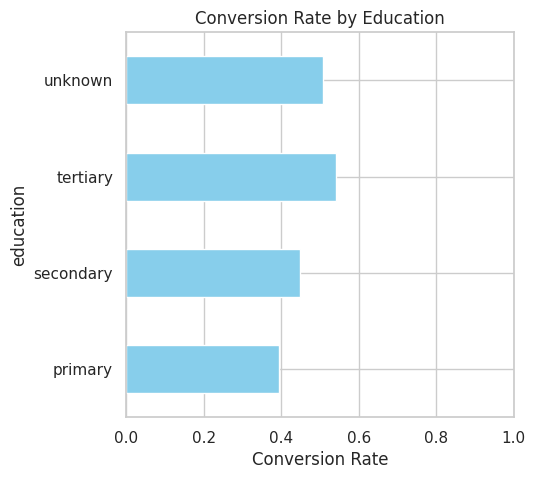

In [62]:
plt.figure(figsize=(5,5))
conv_rate_education.plot(kind='barh', color='skyblue')
plt.xlabel('Conversion Rate')
plt.title('Conversion Rate by Education')
plt.xlim(0,1)
plt.show()

Impact of Previous Campaign Outcome (poutcome)

In [68]:
df['poutcome'].value_counts()

,count
poutcome,
unknown,8326
failure,1228
success,1071
other,537


This table shows the distribution of previous campaign outcomes (poutcome). The majority of customers have an unknown previous outcome (over 8,000 records), meaning they were either never contacted before or the result was not recorded. Smaller groups have a recorded failure or success, and the other category is the least common. This indicates that only a minority of customers have clear historical campaign outcome data.

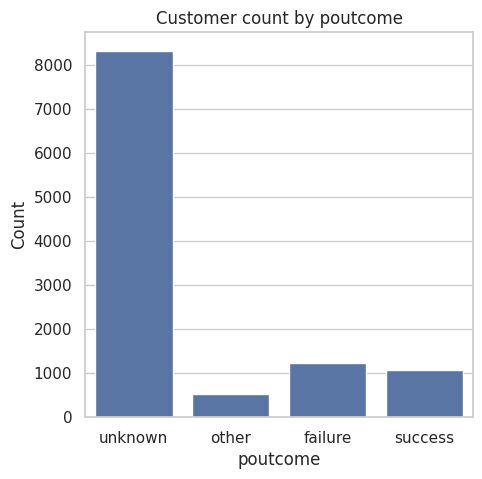

In [69]:
plt.figure(figsize=(5,5))
sns.countplot(x='poutcome', data=df)
plt.title('Customer count by poutcome')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.show()

This chart shows how many customers fall into each category of previous campaign outcome (unknown, other, failure, success)



*  Most customers have an unknown previous outcome, meaning they were either   never contacted before or the history is not recorded.
*  Only a small fraction of customers have a recorded success or failure from past campaigns.
*  Because of this imbalance, insights based on poutcome will mainly apply to a relatively small subset of customers.








In [74]:
conv_rate_poutcome = df.groupby('poutcome')['deposit_flag'].mean()
conv_rate_poutcome

,deposit_flag
poutcome,
failure,0.503257
other,0.571695
success,0.913165
unknown,0.406678


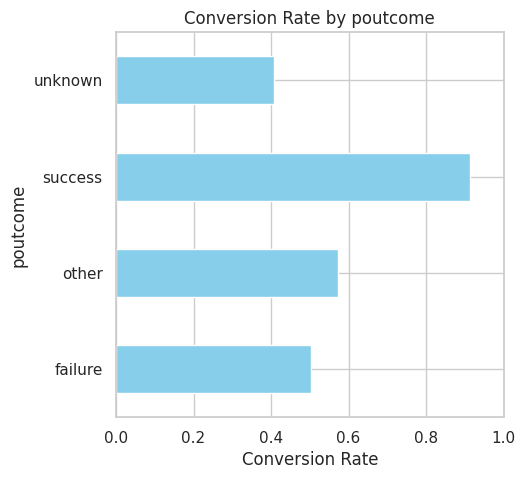

In [75]:
plt.figure(figsize=(5,5))
conv_rate_poutcome.plot(kind='barh', color='skyblue')
plt.xlabel('Conversion Rate')
plt.title('Conversion Rate by poutcome')
plt.xlim(0,1)
plt.show()

This chart shows how the current campaign’s conversion rate varies depending on the outcome of the previous marketing contact.


*  Customers with a previous success have by far the highest conversion rate (around 90%+), meaning they almost always subscribe again when contacted.
*  Customers with failure or other outcomes convert at a moderate rate (around 50–60%), close to or slightly above the overall average.
* Customers with unknown previous outcome (no recorded history) show the lowest conversion rate (around 40%).





Overall response:
Slightly more customers did not subscribe to the term deposit (53%) than those who did (47%).

Age groups:
Most customers are between 30–40 years old, followed by 40–50 and 50+, with <30 being the smallest group.
In terms of conversion, customers <30 and 50+ show the highest subscription rates (59% and 51%), while the 30–40 and 40–50 groups have lower rates (44% and 40%).

Job type:
The campaign mainly reaches customers in management, blue‑collar, and technician roles.
The highest conversion rates are observed for students (75%), retired customers (66%), and the unemployed (57%), followed by management. Blue‑collar, entrepreneur, services, and housemaid roles convert below average.

Contact method:
Most customers are contacted via cellular (over 8,000 records), with far fewer via telephone and some with unknown contact type.
Conversion is highest for cellular contacts (54%), slightly lower for telephone (50%), and much lower for the unknown group (23%).

Marital status:
The majority of clients are married, followed by single and divorced customers.
However, single customers have the highest conversion rate (54%), compared with divorced (48%) and married (44%).

Education level:
Most customers have secondary education (about 5,500), followed by tertiary, then primary; the unknown category is small.
Conversion is highest among customers with tertiary education (54%), followed by unknown (51%) and secondary (45%), while primary education has the lowest rate (39%).

Previous campaign outcome (poutcome):
Most customers have an unknown previous outcome (over 8,000 records); only a minority have recorded success, failure, or other results.
Customers with a previous success have a very high current conversion rate (around 90%), much higher than those with failure, other, or unknown outcomes, indicating that retargeting previously successful customers is extremely effective.